# Import Libraries and Data

In [1]:
!pip install plotly --upgrade --quiet

In [2]:
# Python libraries
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import xgboost as xgb
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import plotly.io as pio ## Important for colab
pio.renderers.default = 'colab'

warnings.filterwarnings('ignore')

In [4]:
file_id = "1tv2dfgghMKzN_mKmdn0ymCUrkwVvBk3w"
url = f"https://drive.google.com/uc?id={file_id}"
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data = df.copy()

# Data Summarization

In [6]:
df.shape

(1470, 35)

In [7]:
df.Attrition.value_counts(normalize='True')

,proportion
Attrition,
No,0.838776
Yes,0.161224


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
df.describe(include='int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
null_feat = pd.DataFrame(len(data['Attrition']) - data.isnull().sum(), columns=['Count'])
null_feat

,Count
Age,1470
Attrition,1470
BusinessTravel,1470
DailyRate,1470
Department,1470
DistanceFromHome,1470
Education,1470
EducationField,1470
EmployeeCount,1470
EmployeeNumber,1470


In [12]:
# Calculate missing values count

# Create a bar trace for the missing values
trace = go.Bar(
            x=null_feat.index,
            y=null_feat['Count'],
            opacity=0.8,
            marker=dict(
                color='lightgrey',
                line=dict(color='#000000', width=1.5)
    )
)

# Define the layout
layout = go.Layout(
    title="Missing Values",
    xaxis_title="Features",
    yaxis_title="Count of Non-Missing Values",
    template="plotly_white"
)

# Combine trace and layout into a figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()


In [13]:
data.columns.to_list()


['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## Reassign the target variable and drop the unneccesary columns

In [14]:
# Reassign target
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
# Drop useless feat
# data = data.drop(columns=['StandardHours',
#                           'EmployeeCount',
#                           'Over18',
#                         ])

# EDA

In [15]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

#------------COUNT-----------------------
trace = go.Bar(x = (len(attrition), len(no_attrition)), y = ['Yes_attrition', 'No_attrition'], orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'lightskyblue'],
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  'Count of attrition variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)


#------------PERCENTAGE-------------------
trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(),
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of attrition variable')

fig = dict(data = [trace], layout=layout)
py.iplot(fig)


In [16]:
# # ------------ COUNT -----------------------
# # Horizontal bar chart for the count of attrition
# trace1 = go.Bar(
#     x=[len(attrition), len(no_attrition)],
#     y=['Yes_attrition', 'No_attrition'],
#     orientation='h',
#     opacity=0.8,
#     marker=dict(
#         color=['gold', 'lightskyblue'],
#         line=dict(color='#000000', width=1.5)
#     )
# )

# layout1 = go.Layout(
#     title='Count of Attrition Variable',
#     xaxis_title="Count",
#     yaxis_title="Attrition Status",
#     template='plotly_white'
# )

# fig1 = go.Figure(data=[trace1], layout=layout1)
# fig1.show()

# # ------------ PERCENTAGE -------------------
# # Pie chart for the distribution of attrition
# trace2 = go.Pie(
#     labels=['No_attrition', 'Yes_attrition'],
#     values=data['Attrition'].value_counts(),
#     textfont=dict(size=15),
#     opacity=0.8,
#     marker=dict(
#         colors=['lightskyblue', 'gold'],
#         line=dict(color='#000000', width=1.5)
#     )
# )

# layout2 = go.Layout(
#     title='Distribution of Attrition Variable',
#     template='plotly_white'
# )

# fig2 = go.Figure(data=[trace2], layout=layout2)
# fig2.show()


## Feature Distribution and barplot (hue = Atrrition)

In [17]:
def plot_distribution(var_select, bin_size) :
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]

    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)

    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [18]:
tpi = pd.DataFrame(pd.crosstab(data['OverTime'],data['Attrition']), )
tpi

Attrition,0,1
OverTime,,
No,944,110
Yes,289,127


In [19]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  :
        tmp3 = tmp3.sort_values(1, ascending = False)

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))


    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))

    trace3 =  go.Scatter(
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [-0, 75],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% Attrition'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

### plot_distribution and bar_plot

In [20]:
plot_distribution('Age', False)

In [21]:
barplot('Age', False)

In [22]:
plot_distribution('DailyRate', 100)

In [23]:
plot_distribution('DistanceFromHome', False)

In [24]:
barplot('DistanceFromHome', False)

In [25]:
plot_distribution('HourlyRate', False)

In [26]:
plot_distribution('MonthlyIncome', 100)

In [27]:
plot_distribution('MonthlyRate', 100)

In [28]:
plot_distribution('NumCompaniesWorked', False)

In [29]:
barplot('NumCompaniesWorked',False)

In [30]:
plot_distribution('PercentSalaryHike', False)

In [31]:
barplot('PercentSalaryHike', False)

In [32]:
plot_distribution('TotalWorkingYears', False)

In [33]:
barplot('TotalWorkingYears', False)

In [34]:
plot_distribution('TrainingTimesLastYear', False)

In [35]:
barplot('TrainingTimesLastYear',False)

In [36]:
plot_distribution('YearsAtCompany', False)

In [37]:
barplot('YearsAtCompany', False)

In [38]:
plot_distribution('YearsInCurrentRole', False)

In [39]:
plot_distribution('YearsInCurrentRole', False)

In [40]:
barplot('YearsInCurrentRole', False)

In [41]:
plot_distribution('YearsSinceLastPromotion', False)

In [42]:
barplot('YearsSinceLastPromotion', False)

In [43]:
plot_distribution('YearsWithCurrManager', False)

In [44]:
barplot('YearsWithCurrManager', False)

### Pie Plot and Bar Plot

In [45]:
def plot_pie(var_select) :

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightgrey', 'orange', 'white', 'lightpink']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))


    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [46]:
plot_pie("Gender")

In [47]:
barplot('Gender',True)

In [48]:
plot_pie('OverTime')

In [49]:
barplot('OverTime',True)

In [50]:
plot_pie('BusinessTravel')

In [51]:
barplot('BusinessTravel',True)

In [52]:
plot_pie('JobRole')

In [53]:
barplot('JobRole',True)

In [54]:
plot_pie('Department')

In [55]:
barplot('Department',True)

In [56]:
plot_pie('MaritalStatus')

In [57]:
barplot('MaritalStatus',True)

In [58]:
plot_pie('EducationField')

In [59]:
barplot('EducationField',True)

In [60]:
plot_pie('Education')

In [61]:
barplot('Education',False)

In [62]:
plot_pie('EnvironmentSatisfaction')

In [63]:
barplot('EnvironmentSatisfaction',False)

In [64]:
plot_pie('JobInvolvement')

In [65]:
barplot('JobInvolvement', False)

In [66]:
plot_pie('JobLevel')

In [67]:
barplot('JobLevel',False)

In [68]:
plot_pie('JobSatisfaction')

In [69]:
barplot('JobSatisfaction',False)

In [70]:
plot_pie('PerformanceRating')

In [71]:
barplot('PerformanceRating',False)

In [72]:
plot_pie('RelationshipSatisfaction')

In [73]:
barplot('RelationshipSatisfaction', False)

In [74]:
plot_pie('StockOptionLevel')

In [75]:
barplot('StockOptionLevel', False)

In [76]:
plot_pie('WorkLifeBalance')

In [77]:
barplot('WorkLifeBalance', False)

# Feature Engineering and Selection

In [78]:
df1 = data.copy()

In [79]:
def SalesDpt(data) :
    if data['Department'] == 'Sales':
        return 1
    else:
        return 0
data['SalesDpt'] = data.apply(lambda data:SalesDpt(data) ,axis = 1)

def JobInvCut(data) :
    if data['JobInvolvement'] < 2.5 :
        return 1
    else:
        return 0
data['JobInvCut'] = data.apply(lambda data:JobInvCut(data) ,axis = 1)

def MiddleTraining(data) :
    if data['TrainingTimesLastYear'] >= 3 and data['TrainingTimesLastYear'] <= 6:
        return 1
    else:
        return 0
data['MiddleTraining'] = data.apply(lambda data:MiddleTraining(data) ,axis = 1)

def MoovingPeople(data) :
    if data['NumCompaniesWorked'] > 4:
        return 1
    else:
        return 0
data['MoovingPeople'] = data.apply(lambda data:MoovingPeople(data), axis = 1)

data['TotalSatisfaction_mean'] = (data['RelationshipSatisfaction']  + data['EnvironmentSatisfaction'] + data['JobSatisfaction'] + data['JobInvolvement'] + data['WorkLifeBalance'])/5

def NotSatif(data) :
    if  data['TotalSatisfaction_mean'] < 2.35 :
        return 1
    else :
        return 0
data['NotSatif'] = data.apply(lambda data:NotSatif(data) ,axis = 1)

def LongDisWL1(data) :
    if  data['DistanceFromHome'] > 11 and data['WorkLifeBalance'] == 1 :
        return 1
    else :
        return 0
data['LongDisWL1'] = data.apply(lambda data:LongDisWL1(data) ,axis = 1)

def LongDis(data) :
    if  data['DistanceFromHome'] > 11:
        return 1
    else :
        return 0
data['LongDis'] = data.apply(lambda data:LongDis(data) ,axis = 1)

def LongDisJobS1(data) :
    if  data['DistanceFromHome'] > 11 and data['JobSatisfaction'] == 1 :
        return 1
    else :
        return 0
data['LongDisJobS1'] = data.apply(lambda data:LongDisJobS1(data) ,axis = 1)

def LongDisJL1(data) :
    if  data['DistanceFromHome'] > 11 and data['JobLevel'] == 1 :
        return 1
    else :
        return 0
data['LongDisJL1'] = data.apply(lambda data:LongDisJL1(data) ,axis = 1)

def ShortDisNotSingle(data) :
    if  data['MaritalStatus'] != 'Single' and data['DistanceFromHome'] < 5:
        return 1
    else :
        return 0
data['ShortDisNotSingle'] = data.apply(lambda data:ShortDisNotSingle(data) ,axis = 1)

def LongDisSingle(data) :
    if  data['MaritalStatus'] == 'Single' and data['DistanceFromHome'] > 11:
        return 1
    else :
        return 0
data['LongDisSingle'] = data.apply(lambda data:LongDisSingle(data) ,axis = 1)

def Engaged(data) :
    if data['Age'] > 35 and data['MaritalStatus'] != 'Single':
        return 1
    else :
        return 0
data['Engaged'] = data.apply(lambda data:Engaged(data) ,axis = 1)

def YoungAndBadPaid(data) :
    if data['Age'] < 35 and data['Age'] > 23 and (data['MonthlyIncome'] < 3500):
        return 1
    else :
        return 0
data['YoungAndBadPaid'] = data.apply(lambda data:YoungAndBadPaid(data) ,axis = 1)

def YoungNeverEngaged(data) :
    if data['Age'] < 24 and data['MaritalStatus'] == 'Single' :
        return 1
    else :
        return 0
data['YoungNeverEngaged'] = data.apply(lambda data:YoungNeverEngaged(data) ,axis = 1)

data['Time_in_each_comp'] = (data['Age'] - 20) / ((data)['NumCompaniesWorked'] + 1)
data['RelSatisf_mean'] = (data['RelationshipSatisfaction']  + data['EnvironmentSatisfaction']) / 2
data['JobSatisf_mean'] = (data['JobSatisfaction'] + data['JobInvolvement']) / 2
data['Income_Distance'] = data['MonthlyIncome'] / data['DistanceFromHome']
data['Hrate_Mrate'] = data['HourlyRate'] / data['MonthlyRate']
data['Stability'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['Stability'].fillna((data['Stability'].mean()), inplace=True)
data['Income_YearsComp'] = data['MonthlyIncome'] / data['YearsAtCompany']
data['Income_YearsComp'] = data['Income_YearsComp'].replace(np.Inf, 0)
data['Fidelity'] = (data['NumCompaniesWorked']) / data['TotalWorkingYears']
data['Fidelity'] = data['Fidelity'].replace(np.Inf, 0)

In [80]:
data.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'SalesDpt',
 'JobInvCut',
 'MiddleTraining',
 'MoovingPeople',
 'TotalSatisfaction_mean',
 'NotSatif',
 'LongDisWL1',
 'LongDis',
 'LongDisJobS1',
 'LongDisJL1',
 'ShortDisNotSingle',
 'LongDisSingle',
 'Engaged',
 'YoungAndBadPaid',
 'YoungNeverEngaged',
 'Time_in_each_comp',
 'RelSatisf_mean',
 'JobSatisf_mean',
 'Income_Distance',
 'Hrate_Mr

In [81]:
barplot('Engaged', False)
barplot('YoungAndBadPaid', False)
barplot('YoungNeverEngaged', False)
barplot('LongDisSingle', False)
barplot('LongDisJL1', False)
barplot('ShortDisNotSingle', False)

## Drop some Features

In [82]:
data = data.drop(columns=[
                        'Age',
                        'MonthlyIncome',
                        'YearsAtCompany',
                        'DistanceFromHome',
                        'PerformanceRating',
                        'NumCompaniesWorked'
                     ])

print ("\nMissing values :  ", data.isnull().sum().values.sum())


Missing values :   0


In [83]:
df2 = data.copy()

In [84]:
#customer id col
Id_col     = ['EmployeeNumber']
#Target columns
target_col = ["Attrition"]

#categorical columns
cat_cols   = data.nunique()[data.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]


#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]


In [85]:
data.nunique()[data.nunique() == 2].keys().tolist()

['Attrition',
 'Gender',
 'OverTime',
 'SalesDpt',
 'JobInvCut',
 'MiddleTraining',
 'MoovingPeople',
 'NotSatif',
 'LongDisWL1',
 'LongDis',
 'LongDisJobS1',
 'LongDisJL1',
 'ShortDisNotSingle',
 'LongDisSingle',
 'Engaged',
 'YoungAndBadPaid',
 'YoungNeverEngaged']

In [86]:
num_cols

['DailyRate',
 'HourlyRate',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'TotalSatisfaction_mean',
 'Time_in_each_comp',
 'Income_Distance',
 'Hrate_Mrate',
 'Stability',
 'Income_YearsComp',
 'Fidelity']

In [87]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])

#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [88]:

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()

data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled, left_index=True, right_index=True, how = "left")
data = data.drop(['EmployeeNumber'],axis = 1)

In [89]:
data.head()

,Attrition,Gender,OverTime,SalesDpt,JobInvCut,MiddleTraining,MoovingPeople,NotSatif,LongDisWL1,LongDis,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean,Time_in_each_comp,Income_Distance,Hrate_Mrate,Stability,Income_YearsComp,Fidelity
0,1,0,1,1,0,0,1,1,0,0,...,-0.063296,-0.679146,0.245834,-1.238894,-0.774273,1.328107,-0.330471,2.234862e-01,-0.241733,1.775509
1,0,1,0,0,1,1,0,0,0,0,...,0.764998,-0.368715,0.806541,0.161650,1.578035,-0.451684,-0.715919,3.289956e-01,-0.473382,-0.620450
2,1,1,1,0,1,1,1,0,0,0,...,-1.167687,-0.679146,-1.155935,0.161650,-0.755860,-0.317412,5.114320,-3.514170e-16,-0.717985,1.395198
3,0,0,1,0,0,1,0,0,0,0,...,0.764998,0.252146,-1.155935,1.095346,0.031312,-0.342465,-0.720954,8.829202e-01,-0.544605,-0.553896
4,0,1,0,0,0,1,1,0,0,0,...,-0.615492,-0.058285,-0.595227,-0.305198,-1.090062,-0.088277,-0.723072,1.278581e+00,0.108800,3.106597


In [90]:
#correlation
correlation = data.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = False,
                        #height  = 1400,
                        #width   = 1600,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

## Removing Colinear Features

In [91]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = data.corr().abs()
corr_matrix.head()

,Attrition,Gender,OverTime,SalesDpt,JobInvCut,MiddleTraining,MoovingPeople,NotSatif,LongDisWL1,LongDis,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean,Time_in_each_comp,Income_Distance,Hrate_Mrate,Stability,Income_YearsComp,Fidelity
Attrition,1.000000,0.029453,0.246118,0.080855,0.100493,0.050715,0.078832,0.182389,0.074893,0.090791,...,0.160545,0.033019,0.156199,0.193395,0.142292,0.113071,0.011526,0.105810,0.000428,0.225917
Gender,0.029453,1.000000,0.041924,0.032017,0.020388,0.021742,0.030026,0.048507,0.015340,0.006170,...,0.041483,0.026985,0.030599,0.033969,0.020472,0.016322,0.029134,0.002796,0.018223,0.010195
OverTime,0.246118,0.041924,1.000000,0.005864,0.001269,0.066174,0.037709,0.037499,0.038231,0.042132,...,0.029758,0.012239,0.041586,0.062779,0.023349,0.027402,0.015907,0.020479,0.033736,0.008214
SalesDpt,0.080855,0.032017,0.005864,1.000000,0.000135,0.050157,0.016171,0.042793,0.008388,0.003578,...,0.046883,0.034112,0.027415,0.003156,0.016413,0.000699,0.008906,0.045008,0.024346,0.028313
JobInvCut,0.100493,0.020388,0.001269,0.000135,1.000000,0.022493,0.010965,0.230432,0.006055,0.020556,...,0.009326,0.014139,0.015398,0.299947,0.002937,0.025481,0.016041,0.045266,0.039547,0.021035


In [92]:
np.ones(corr_matrix.shape)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [93]:
upper_triangular = np.triu(np.ones(corr_matrix.shape), k=1)
print(upper_triangular)


[[0. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [94]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # concept
upper.head()

,Attrition,Gender,OverTime,SalesDpt,JobInvCut,MiddleTraining,MoovingPeople,NotSatif,LongDisWL1,LongDis,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction_mean,Time_in_each_comp,Income_Distance,Hrate_Mrate,Stability,Income_YearsComp,Fidelity
Attrition,NaN,0.029453,0.246118,0.080855,0.100493,0.050715,0.078832,0.182389,0.074893,0.090791,...,0.160545,0.033019,0.156199,0.193395,0.142292,0.113071,0.011526,0.105810,0.000428,0.225917
Gender,NaN,NaN,0.041924,0.032017,0.020388,0.021742,0.030026,0.048507,0.015340,0.006170,...,0.041483,0.026985,0.030599,0.033969,0.020472,0.016322,0.029134,0.002796,0.018223,0.010195
OverTime,NaN,NaN,NaN,0.005864,0.001269,0.066174,0.037709,0.037499,0.038231,0.042132,...,0.029758,0.012239,0.041586,0.062779,0.023349,0.027402,0.015907,0.020479,0.033736,0.008214
SalesDpt,NaN,NaN,NaN,NaN,0.000135,0.050157,0.016171,0.042793,0.008388,0.003578,...,0.046883,0.034112,0.027415,0.003156,0.016413,0.000699,0.008906,0.045008,0.024346,0.028313
JobInvCut,NaN,NaN,NaN,NaN,NaN,0.022493,0.010965,0.230432,0.006055,0.020556,...,0.009326,0.014139,0.015398,0.299947,0.002937,0.025481,0.016041,0.045266,0.039547,0.021035


In [95]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

data = data.drop(columns = to_drop)

to_drop

There are 7 columns to remove :


['Department_Research & Development',
 'Department_Sales',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'TrainingTimesLastYear_2']

In [96]:
data.columns.tolist()

['Attrition',
 'Gender',
 'OverTime',
 'SalesDpt',
 'JobInvCut',
 'MiddleTraining',
 'MoovingPeople',
 'NotSatif',
 'LongDisWL1',
 'LongDis',
 'LongDisJobS1',
 'LongDisJL1',
 'ShortDisNotSingle',
 'LongDisSingle',
 'Engaged',
 'YoungAndBadPaid',
 'YoungNeverEngaged',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'EmployeeCount_1',
 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'EnvironmentSatisfaction_4',
 'JobInvolvement_1',
 'JobInvolvement_4',
 'JobLevel_1',
 'JobLevel_2',
 'JobLevel_3',
 'JobLevel_4',
 'JobLevel_5',
 'JobRole_Healthcare Representative',
 'JobRole_Laboratory Technician',
 'JobRo

In [97]:
data.shape

(1470, 107)

# Define functions

## Model Evaluation Metric


### Performance Plot

In [98]:
def model_performance_plot(model) :
    #conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2,
                        colorscale = 'Viridis', showscale  = False)

    #show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values),
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))

    #plot roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : ",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')

    #subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False,
                        subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve'))

    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)

    fig['layout'].update(showlegend = False, title = '<b>Model performance</b><br>'+str(model),
                        autosize = False, height = 900,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig["layout"]["xaxis2"].update((dict(range=[0, 1])))
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05])
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05])
    fig.layout.titlefont.size = 14

    py.iplot(fig)

### Feature Important Plot

In [99]:
def features_imp(model, cf) :

    coefficients  = pd.DataFrame(model.feature_importances_)
    column_data     = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients",
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    layout = dict(title =  'Feature Importances xgb_cfl')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


### Cumilative Curve plot

In [100]:
#cumulative gain curve
def cum_gains_curve(model):
    pos = pd.get_dummies(y_test).to_numpy()
    pos = pos[:,1]
    npos = np.sum(pos)
    index = np.argsort(y_score)
    index = index[::-1]
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos)
    #recall
    recall = cpos/npos
    #size obs test
    n = y_test.shape[0]
    size = np.arange(start=1,stop=369,step=1)
    #proportion
    size = size / n
    #plots
    model = 'xgb_cfl'
    trace1 = go.Scatter(x = size,y = recall,
                        name = "Lift curve",
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace2 = go.Scatter(x = size,y = size,
                        name = "Baseline",
                        showlegend=False,
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))

    layout = dict(title = 'Cumulative gains curve'+' '+str(model),
                  yaxis = dict(title = 'Percentage positive targeted',zeroline = False),
                  xaxis = dict(title = 'Percentage contacted', zeroline = False)
                 )

    fig  = go.Figure(data = [trace1,trace2], layout = layout)
    py.iplot(fig)

### Cross Validation Metrics

In [101]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

## Prepare Dataset

### Spliting Data into X and Y

In [102]:
# Define X and y
y = np.array(data['Attrition'].tolist())  # Convert the 'Attrition' column to a NumPy array
data = data.drop('Attrition', axis=1)     # Drop the 'Attrition' column
X = data.to_numpy()                       # Convert the remaining DataFrame to a NumPy array


In [103]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                 random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 106)
(441, 106)
(1029,)
(441,)


### XGboost - RandomizedSearchCV to Optimize Hyper parameters

In [104]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


xgb_cfl = xgb.XGBClassifier(n_jobs = -1)


# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5
param_comb = 800

random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='accuracy', n_jobs=-1, cv=5, verbose=3, random_state=42)

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 0 hours 0 minutes and 0.0 seconds.


In [105]:
import xgboost as xgb
import numpy as np

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=0.8,
    gamma=1.5,
    learning_rate=0.05,
    max_delta_step=0,
    max_depth=3,
    min_child_weight=7,
    missing=np.nan,  # Fix here
    n_estimators=200,
    n_jobs=-1,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=0.6
)

# Fit the model
xgb_clf.fit(x_train, y_train)

# Predictions
y_pred = xgb_clf.predict(x_test)
y_score = xgb_clf.predict_proba(x_test)[:, 1]

# Evaluate performance (assuming `model_performance_plot` is already defined)
model_performance_plot('xgb_clf')


In [106]:
features_imp(xgb_clf, 'features')

In [107]:
#feature importance plot TOP 40
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature': list(data), 'Feature importance': model.feature_importances_})
    tmp = tmp.sort_values(by='Feature importance',ascending=False).head(30)
    plt.figure(figsize = (10,12))
    plt.title('Top 30 - Features importance - XGBoost',fontsize=14)
    s = sns.barplot(y='Feature',x='Feature importance',data=tmp, orient='h')
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

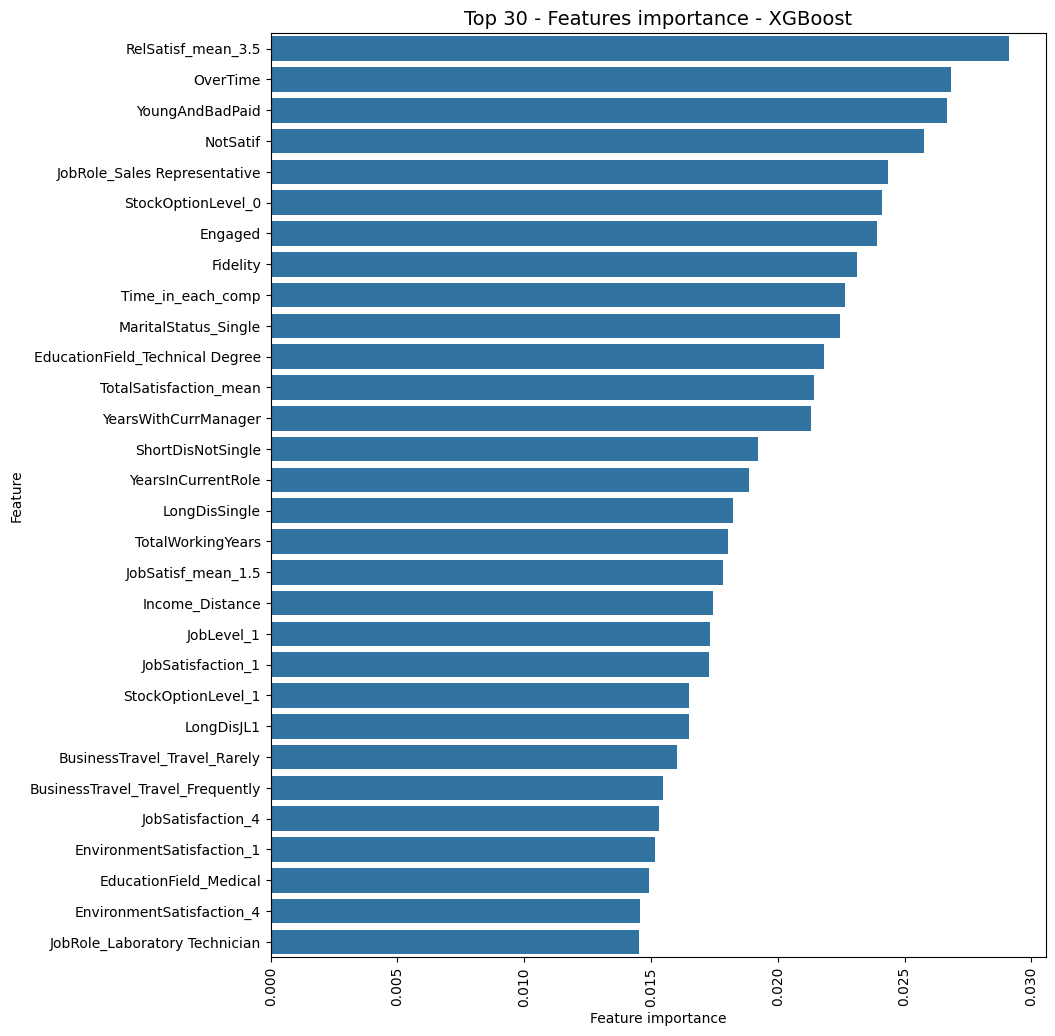

In [108]:
plot_feature_importance(xgb_clf)

In [109]:
cum_gains_curve(xgb_clf)

In [110]:
# Cross val score
cross_val_metrics(xgb_clf)

[accuracy] : 0.88639 (+/- 0.01109)
[precision] : 0.81666 (+/- 0.03359)
[recall] : 0.38457 (+/- 0.08906)
